# **Recognition of gestures and actions**


### **1. Importing the libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

### **2. Loading the image**

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Masterclass /Masterclass/Images/messi.jpg')

In [ ]:
print("Image shape: ", image.shape)
print("Image type: ", type(image))

Image shape:  (1800, 1200, 3)
Image type:  <class 'numpy.ndarray'>


In [ ]:
image = cv2.resize(image, (300, 600))

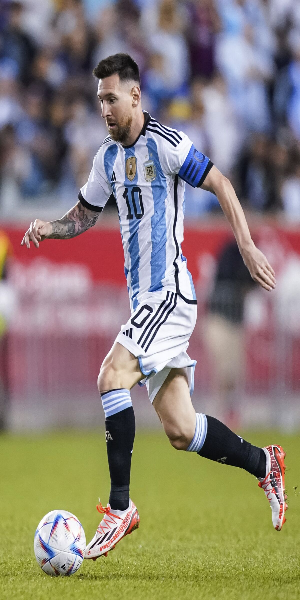

In [ ]:
cv2_imshow(image)

In [ ]:
# Mean subtraction: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
image_blob = cv2.dnn.blobFromImage(image = image, 
                                   scalefactor = 1.0 / 255,
                                   size = (image.shape[1], image.shape[0]))

In [ ]:
type(image_blob), image_blob.shape # batch

(numpy.ndarray, (1, 3, 600, 300))

## **3. Loading the pre-trained neural network**

- Caffe Deep Learning framework: https://caffe.berkeleyvision.org/

In [ ]:
# Import network from folder
network = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/Masterclass /Masterclass/Weights/pose_deploy_linevec_faster_4_stages.prototxt',
                                   '/content/drive/MyDrive/Masterclass /Masterclass/Weights/pose_iter_160000.caffemodel')

In [ ]:
# Display the layers of the network
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [ ]:
# Display the number of layers
len(network.getLayerNames())

127

## **4. Predicting body points**

In [ ]:
network.setInput(image_blob)
output = network.forward()

In [ ]:
# 44 -> related to the points that were detected
# (43, 75) -> information about the location
output.shape

(1, 44, 75, 38)

In [ ]:
position_width = output.shape[3]
position_heigth = output.shape[2]

In [ ]:
# minMaxLoc: https://docs.opencv.org/master/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707

# Initializing variabels
points = []
threshold = 0.1
num_points = 15

# Drawing the points
for i in range(num_points):

  # Get all the points that related to the i place
  confidence_map = output[0, i, :, :]

  # Get the max value and the min location
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)

  # Change the values of location to fit the image size
  x = int((image.shape[1] * point[0]) / position_width)
  y = int((image.shape[0] * point[1]) / position_heigth)

  # Drawing the point on the image
  if threshold < confidence :
    cv2.circle(image, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(image, '{}'.format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)

In [ ]:
# Lets see all the points we found
points

[(102, 56),
 (126, 128),
 (102, 152),
 (86, 208),
 (39, 224),
 (165, 144),
 (213, 176),
 (236, 240),
 (165, 304),
 (181, 424),
 (252, 456),
 (157, 304),
 (110, 376),
 (118, 504),
 (150, 224)]

#### Display the image with the points

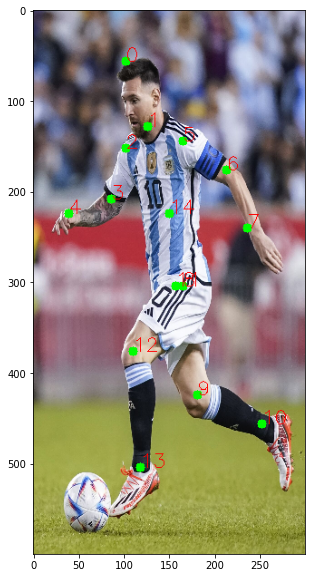

In [ ]:
# Display the image with the points
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

#### Display the image with the line that connect all the points

In [ ]:
point_connections = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7],[1,14],
                     [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]

In [ ]:
point_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [ ]:
for connection in point_connections:

  partA = connection[0]
  partB = connection[1]

  if points[partA] and points[partB]:
    cv2.line(image, points[partA], points[partB], (255,0,0))

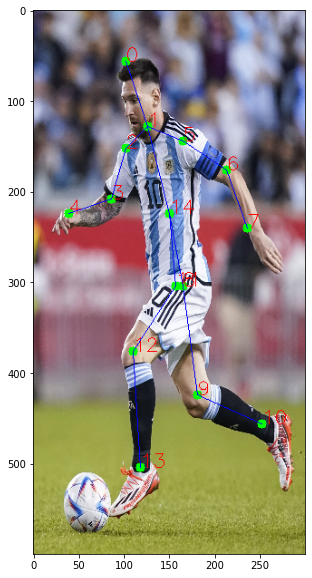

In [ ]:
# Display the image with the points
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

## **5. Detecting movements (arms and legs)**

### Arms above the head in images

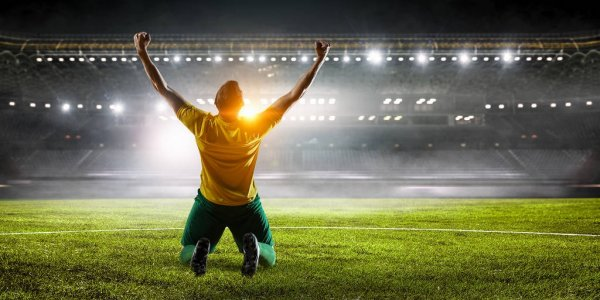

In [ ]:
image2 = cv2.imread('/content/drive/MyDrive/Masterclass /Masterclass/Images/player.jpg')
cv2_imshow(image2)

In [ ]:
def draw_points(image):

  # Create the blob
  image_blob2 = cv2.dnn.blobFromImage(image, scalefactor = 1.0 / 255, size = (image.shape[1], image.shape[0]))

  # Set the input of the model
  network.setInput(image_blob2)

  # Get the output
  output2 = network.forward()

  # Extract the image size parameters
  position_width = output2.shape[3]
  position_height = output2.shape[2]

  # Initializing the varibels
  points = []
  threshold = 0.1
  num_points = 15

  # Draw the points
  for i in range(num_points):

    # Set the points location
    confidence_map = output2[0, i, :, :]
    _, confidence, _, point = cv2.minMaxLoc(confidence_map) 
    x = int((image2.shape[1] * point[0]) / position_width)
    y = int((image2.shape[0] * point[1]) / position_height)
    
    if threshold < confidence:
      cv2.circle(image2, (x, y), 3, (0,255,0), thickness = -1)
      cv2.putText(image2, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
      cv2.putText(image2, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .8, (255,255,255))
      points.append((x, y))
    else:
      points.append(None)

  plt.figure(figsize = [14,10])
  plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB));
  return points

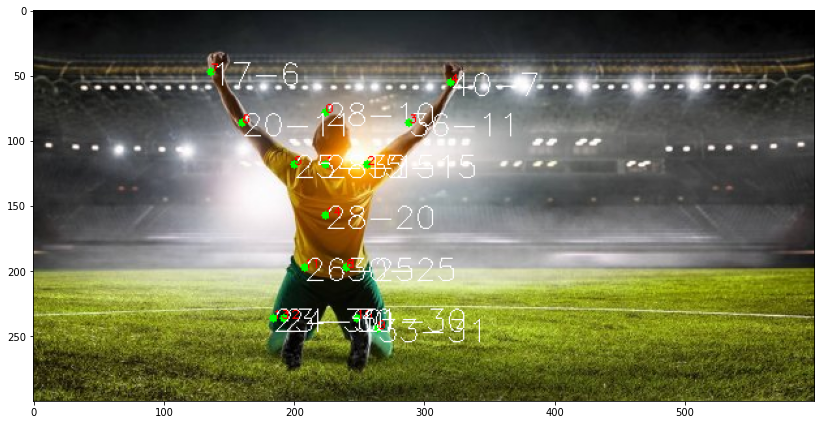

In [ ]:
# Import the image from the folder
image2 = cv2.imread('/content/drive/MyDrive/Masterclass /Masterclass/Images/player.jpg')

points = draw_points(image2)

#### Create function to check the arms above the head

In [ ]:
def verify_arms_up(points):
  head, right_wrist, left_wrist = 0, 0, 0

  if points:
    for i, point in enumerate(points):

      if point:
        # print(i, point)
        if i == 0:
          head = point[1]
        elif i == 4:
          right_wrist = point[1]
        elif i == 7:
          left_wrist = point[1]
  
  #print(head, right_wrist, left_wrist)
  if right_wrist < head and left_wrist < head:
    return True
  else:
    return False

In [ ]:
verify_arms_up(points)

True

#### Create function to check the legs apart

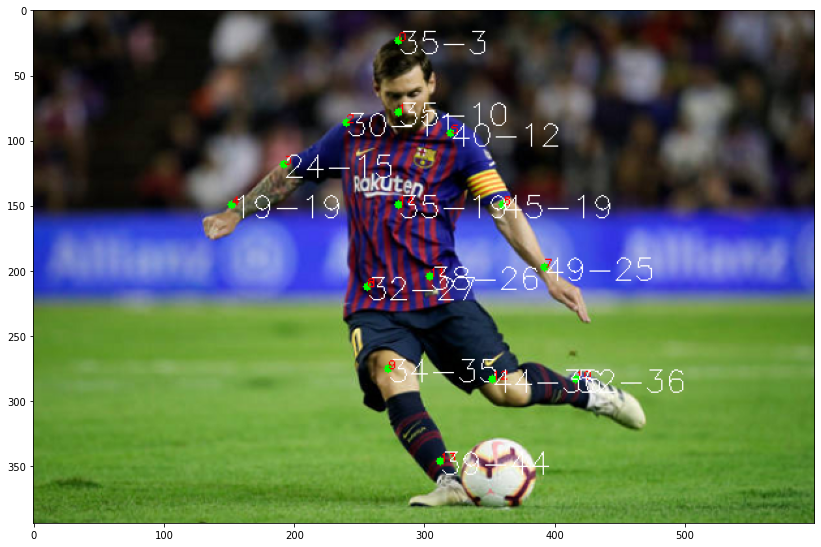

In [ ]:
# Import the image from the folder
image2 = cv2.imread('/content/drive/MyDrive/Masterclass /Masterclass/Images/messi3.png')

points = draw_points(image2)

In [ ]:
def verify_legs_apart(points):
  left_hip, rigth_hip = 0, 0
  left_ankle, right_ankle = 0, 0

  for i, point in enumerate(points):
    if i == 11:
      left_hip = point[0]
    elif i == 8:
      rigth_hip = point[0]
    elif i == 13:
      left_ankle = point[0]
    elif i == 10:
      rigth_ankle = point[0]

  if (left_ankle > left_hip) and (rigth_ankle < rigth_hip):
    return True
  else:
    return False

In [ ]:
verify_legs_apart(points)

False

### Arms above the head in videos

- VideoWriter_fourcc: https://www.programcreek.com/python/example/89348/cv2.VideoWriter_fourcc

In [ ]:
# Import video from the folder
video = '/content/drive/MyDrive/Masterclass /Masterclass/Videos/Yoga2_Trim.mp4'
capture = cv2.VideoCapture(video)
connected, frame = capture.read()

In [ ]:
# Display frame shape
frame.shape

(1080, 1920, 3)

In [ ]:
# Change frame size
# frame = cv2.resize(frame, (600, 900))

In [ ]:
result = '/content/drive/MyDrive/Masterclass /Masterclass/Videos/Yoga_output.mp4'
save_video = cv2.VideoWriter(result, cv2.VideoWriter_fourcc(*'XVID'),  10, (frame.shape[1], frame.shape[0]))

In [ ]:
# https://stackoverflow.com/questions/5217519/what-does-opencvs-cvwaitkey-function-do

i = 0

while cv2.waitKey(1) < 0:
  connected, frame = capture.read()

  if not connected:
    break

  # Create the blob
  image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (256, 256))

  # Set the input of the model
  network.setInput(image_blob)

  # Get the output
  output = network.forward()

  # Extract the image size parameters
  position_width = output.shape[3]
  position_height = output.shape[2]

  # Initializing the varibels
  points = []
  threshold = 0.1
  num_points = 15

  # Draw the points
  for i in range(num_points):

    # Set the points location
    confidence_map = output[0, i, :, :]
    _, confidence, _, point = cv2.minMaxLoc(confidence_map) 
    x = int((frame.shape[1] * point[0]) / position_width)
    y = int((frame.shape[0] * point[1]) / position_height)
    
    # Drawing the points on the frame
    if threshold < confidence:
      cv2.circle(frame, (x, y), 3, (0,255,0), thickness = -1)
      cv2.putText(frame, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
      cv2.putText(frame, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .8, (255,255,255))
      points.append((x, y))
    else:
      points.append(None)

    # print(points)
    # Draw the line between the points on the frame
    for connection in point_connections:
      partA = connection[0]
      partB = connection[1]
      # print("A: ", partA)
      # print("B: ", partB)
      if 14 < len(points):
        if points[partA] and points[partB]:
          cv2.line(frame, points[partA], points[partB], (255,0,0)) 

    # Print "Complete" if the hands above the head
    if verify_arms_up(points) == True and verify_legs_apart(points) == True:
       cv2.putText(frame, 'Complete', (50,200), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,255))

  plt.figure(figsize = [14,10])
  plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB));

  if i%120 == 0:
    cv2_imshow(frame)
    save_video.write(frame)

  i += 1
save_video.release()

File was too big to display video in Github so we display only one image frim video

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Final Project/Human Analysis/Yoga gestures.png')

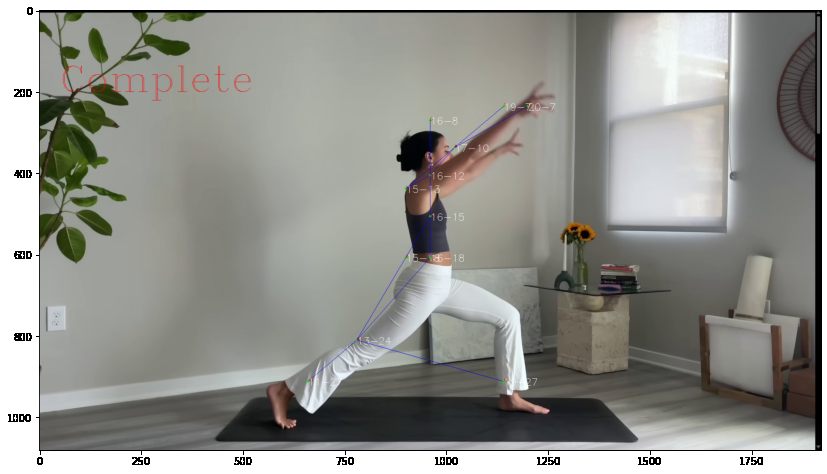

In [ ]:
cv2_imshow(image)